# Presidental Sentiment Analysis Using Twitter Data 
## *Results*
---

In [34]:
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [35]:
trump = pd.read_csv("data/trumpresults.csv", header=0)
obama = pd.read_csv("data/obamaresults.csv", header=0)

In [36]:
trump_scores = trump['Sentiment Scores']
trump_classes = trump['Classification']
obama_scores = obama['Sentiment Scores']
obama_classes = obama['Classification']

In [37]:
# Create a joined dataframe (used for joint plots)
trump["President"] = "Trump"
obama["President"] = "Obama"
joined_data = pd.concat([trump, obama])

To get an idea of how the scoring system works, let's look at the lowest and highest scored tweets from the Trump data

In [38]:
# Lowest score (negative sentiment)
print("Most negative tweet (score = {0:.2f}):\n\n{1}".format(min(trump_scores), trump[trump['Sentiment Scores'] == min(trump_scores)]['Tweet Text'].all()))

# Highest score (Positive sentiment)
print("\nMost positive tweet (score = {0:.2f}):\n\n{1}".format(max(trump_scores), trump[trump['Sentiment Scores'] == max(trump_scores)]['Tweet Text'].all()))

Most negative tweet (score = -0.76):

mimirocah1 you gotta hand it to the evil orange asshole hes got distractions going all over in all directions im losing hope that america is screwed the trump crime family is going to lock it up with the aid of complicit republican lap dogs i dont know what happened or whats to happen

Most positive tweet (score = 0.81):

realdonaldtrump beautiful man beautiful spirit thank you for posting thank you for blessing our country president trump god bless you and keep you your family and america safe


# Visualizations

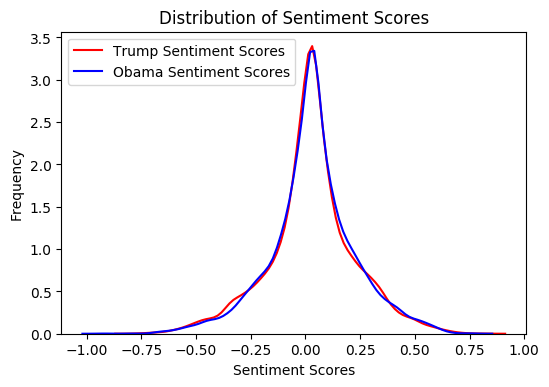

In [43]:
plt.figure(dpi=100)
sns.kdeplot(trump_scores, color='r', label="Trump Sentiment Scores")
sns.kdeplot(obama_scores, color='b', label="Obama Sentiment Scores")
plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.legend()
plt.show()

We can see that both distributions appear quite similar, though Obama's is slightly shifted in the positive direction (it has a greater mean).

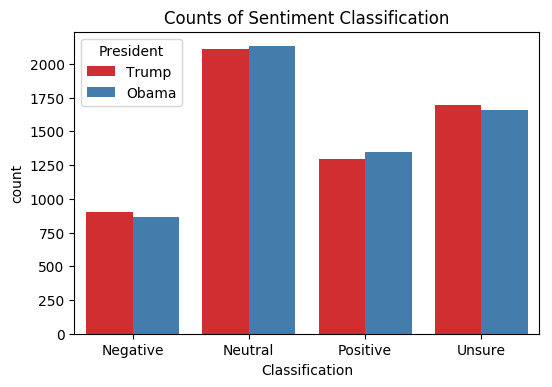

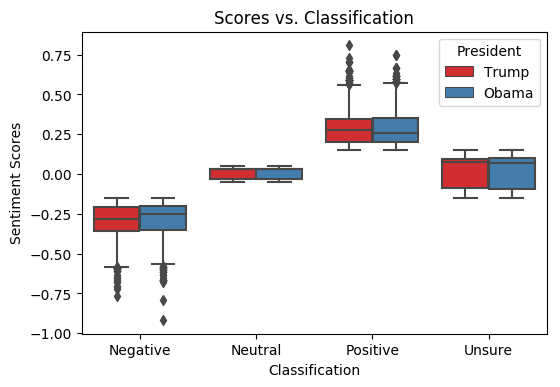

In [40]:
plt.figure(dpi=100)
sns.countplot(x="Classification", hue="President", data=joined_data, order=['Negative', 'Neutral', 'Positive', 'Unsure'], palette="Set1", saturation=0.8)
plt.title("Counts of Sentiment Classification")
plt.show()

plt.figure(dpi=100)
sns.boxplot(x="Classification", y="Sentiment Scores", hue="President", data=joined_data, order=['Negative', 'Neutral', 'Positive', 'Unsure'], palette="Set1", saturation=0.8)
plt.title("Scores vs. Classification")
plt.show()

## Descriptive and Inferential Analysis

In [41]:
print("Average sentiment score for Trump data: {0:.3f}".format(statistics.mean(trump_scores)))
print("Median sentiment score for Trump data: {0:.3f}".format(statistics.median(trump_scores)))
print("Standard Deviation of sentiment scores for Trump data: {0:.3f}\n".format(statistics.stdev(trump_scores)))

print("Average sentiment score for Obama data: {0:.3f}".format(statistics.mean(obama_scores)))
print("Median sentiment score for Obama data: {0:.3f}".format(statistics.median(obama_scores)))
print("Standard Deviation of sentiment scores for Obama data: {0:.3f}".format(statistics.stdev(obama_scores)))

Average sentiment score for Trump data: 0.027
Median sentiment score for Trump data: 0.029
Standard Deviation of sentiment scores for Trump data: 0.199

Average sentiment score for Obama data: 0.033
Median sentiment score for Obama data: 0.033
Standard Deviation of sentiment scores for Obama data: 0.195


In [42]:
test1 = stats.ttest_ind(obama_scores, trump_scores)
test2 = stats.median_test(obama_scores, trump_scores)
test3 = stats.mannwhitneyu(obama_scores, trump_scores)

print("Unpaired t-test for equal population means resulted in a p-value of {0:.5f}".format(test1.pvalue))
print("Mood's median test for equal population medians resulted in a p-value of {0:.5f}".format(test2[1]))
print("Mann-Whitney U test for equal population distributions resulted in a p-value of {0:.5f}".format(test3.pvalue))

Unpaired t-test for equal population means resulted in a p-value of 0.12772
Mood's median test for equal population medians resulted in a p-value of 0.00000
Mann-Whitney U test for equal population distributions resulted in a p-value of 0.00007


# Conclusions

* As is evident from the visualizations, the distribution of sentiment scores for both samples is similar. Accordingly, the distribution of classifications for both samples is also quite similar, though the Obama sample has slightly more positive and less negative tweet classifications.


* The nonparametric tests found statistically significant differences between the population medians. 


* The parametric t-test did not find statistically significant differences between the population means (and the assumption of normality/equal variances is aproximately upheld, so the test is valid).


* Thus, we did not detect significant differences in mean sentiment scores between Trump tweets and Obama tweets, though we did detect significant differences in the median sentiment scores.

# Limitations

The scoring method, which combines TextBlob polarity scores and a second positive/negative dictionary lookup, is very imprecise and fails in several circumstances: When the text is subjective, sarcastic, or otherwise not explicity negative/positive, the score is highly variable. This leads to many "Neutral" and "Unsure" classifications, though in reality tweets classified as such may very well have been definitively negative or positive. Similarly, some tweets are firmly (but incorrectly) classified as "Negative" or "Positive". Nevertheless, the scoring system does, on average, get the gist of the sentiment correctly.